# TASK 2

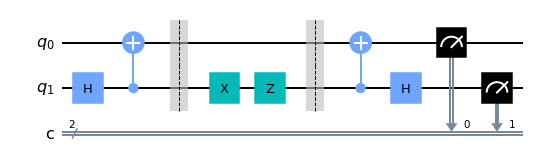

In [1]:
%run Matrices.ipynb
%matplotlib inline

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from numpy import pi, sqrt

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
qc.h(q[1])
qc.cx(q[1], q[0])
qc.barrier(range(2))
qc.x(q[1])
qc.z(q[1])
qc.barrier(range(2))
qc.cx(q[1], q[0])
qc.h(q[1])

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state = np.round(np.array(job.result().get_statevector(qc)), decimals=10)

# measurement
qc.measure(q, c)
#qc.measure(q[0], c[0])
#qc.measure(q[1], c[1])

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qc)

qc.draw(output='mpl',reverse_bits=False)

In [2]:
Matrix(current_quantum_state.real)

[ 0 ]
[   ]
[ 0 ]
[   ]
[ 0 ]
[   ]
[1.0]

In [3]:
#print(Matrix(current_quantum_state.real))
Statevector(np.array(current_quantum_state)).draw(output='latex')

<IPython.core.display.Latex object>

results:  {'11': 1024}


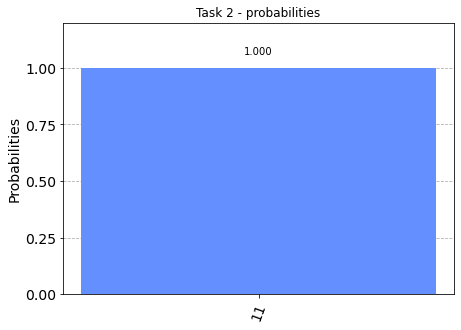

In [4]:
print("results: ", counts)
plot_histogram(job.result().get_counts(), title="Task 2 - probabilities")

$\color{blue}{\text{1. First part is making a pair of qubits entangled.}}$ <br>
$\color{blue}{\text{2. In the second part, sender applies quantum gates on qubits to create the desired message.}}$ <br>
$\color{blue}{\text{3. Third part is a Bell measurement performed by reciever. The measurement allows us to read the sent message.}}$

## Checking results by computation

In [5]:
SV = TensorProduct(H,I)@CNOT@TensorProduct(Z,I)@TensorProduct(X,I)@CNOT@TensorProduct(H,I)@TensorProduct(zero,zero)
print("The output statevector:", SV)
SV

The output statevector: Matrix([[0], [0], [0], [1]])


[0]
[ ]
[0]
[ ]
[0]
[ ]
[1]

In [6]:
Statevector(np.array(SV)).draw(output='latex')

<IPython.core.display.Latex object>

$\color{blue}{\text{I would say that Alice sent message 11 to Bob.}}$

## Observing other states

__Observing state 00__

results:  {'00': 1024}


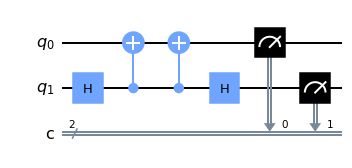

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from numpy import pi

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
qc.h(q[1])
qc.cx(q[1], q[0])
#qc.x(q[1])
#qc.z(q[1])
qc.cx(q[1], q[0])
qc.h(q[1])

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
qstate00 = np.round(np.array(job.result().get_statevector(qc)), decimals=10)

qc.measure(q, c)

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qc)
print("results: ", counts)

qc.draw(output='mpl',reverse_bits=False)

In [8]:
print("Observing state: ", qstate00.real)
Statevector(np.array(qstate00)).draw(output='latex')

Observing state:  [1. 0. 0. 0.]


<IPython.core.display.Latex object>

__Observing state 01__

results:  {'01': 1024}


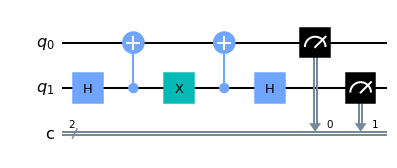

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from numpy import pi

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
qc.h(q[1])
qc.cx(q[1], q[0])
qc.x(q[1])
#qc.z(q[1])
qc.cx(q[1], q[0])
qc.h(q[1])


job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
qstate01 = np.round(np.array(job.result().get_statevector(qc)), decimals=10)

qc.measure(q, c)

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qc)
print("results: ", counts)

qc.draw(output='mpl',reverse_bits=False)

In [10]:
print("Observing state: ", qstate01.real)
Statevector(np.array(qstate01)).draw(output='latex')

Observing state:  [ 0.  1.  0. -0.]


<IPython.core.display.Latex object>

__Observing state 10__

results:  {'10': 1024}


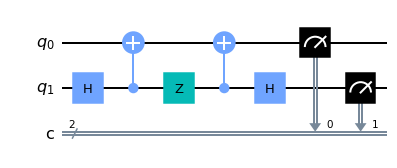

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from numpy import pi

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers
    
qc.h(q[1])
qc.cx(q[1], q[0])
#qc.x(q[1])
qc.z(q[1])
qc.cx(q[1], q[0])
qc.h(q[1])

job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
qstate10 = np.round(np.array(job.result().get_statevector(qc)), decimals=10)

qc.measure(q, c)

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qc)
print("results: ", counts)

qc.draw(output='mpl',reverse_bits=False)

In [12]:
print("Observing state: ", qstate10.real)
Statevector(np.array(qstate10)).draw(output='latex')

Observing state:  [0. 0. 1. 0.]


<IPython.core.display.Latex object>

## Outcomes from IBM Quantum

<img src="Task_2.png"/>